In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [4]:
data=pd.read_csv("/content/heart.csv")

In [5]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


output
1    165
0    138
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

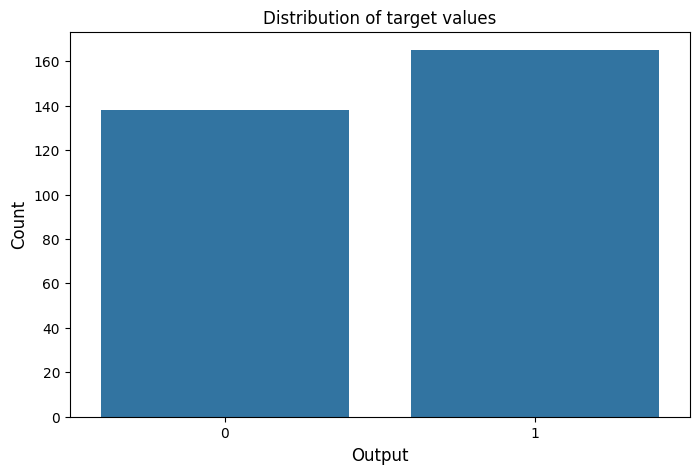

In [26]:
print(data['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = data['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

In [27]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data['output'].unique()

array([1, 0])

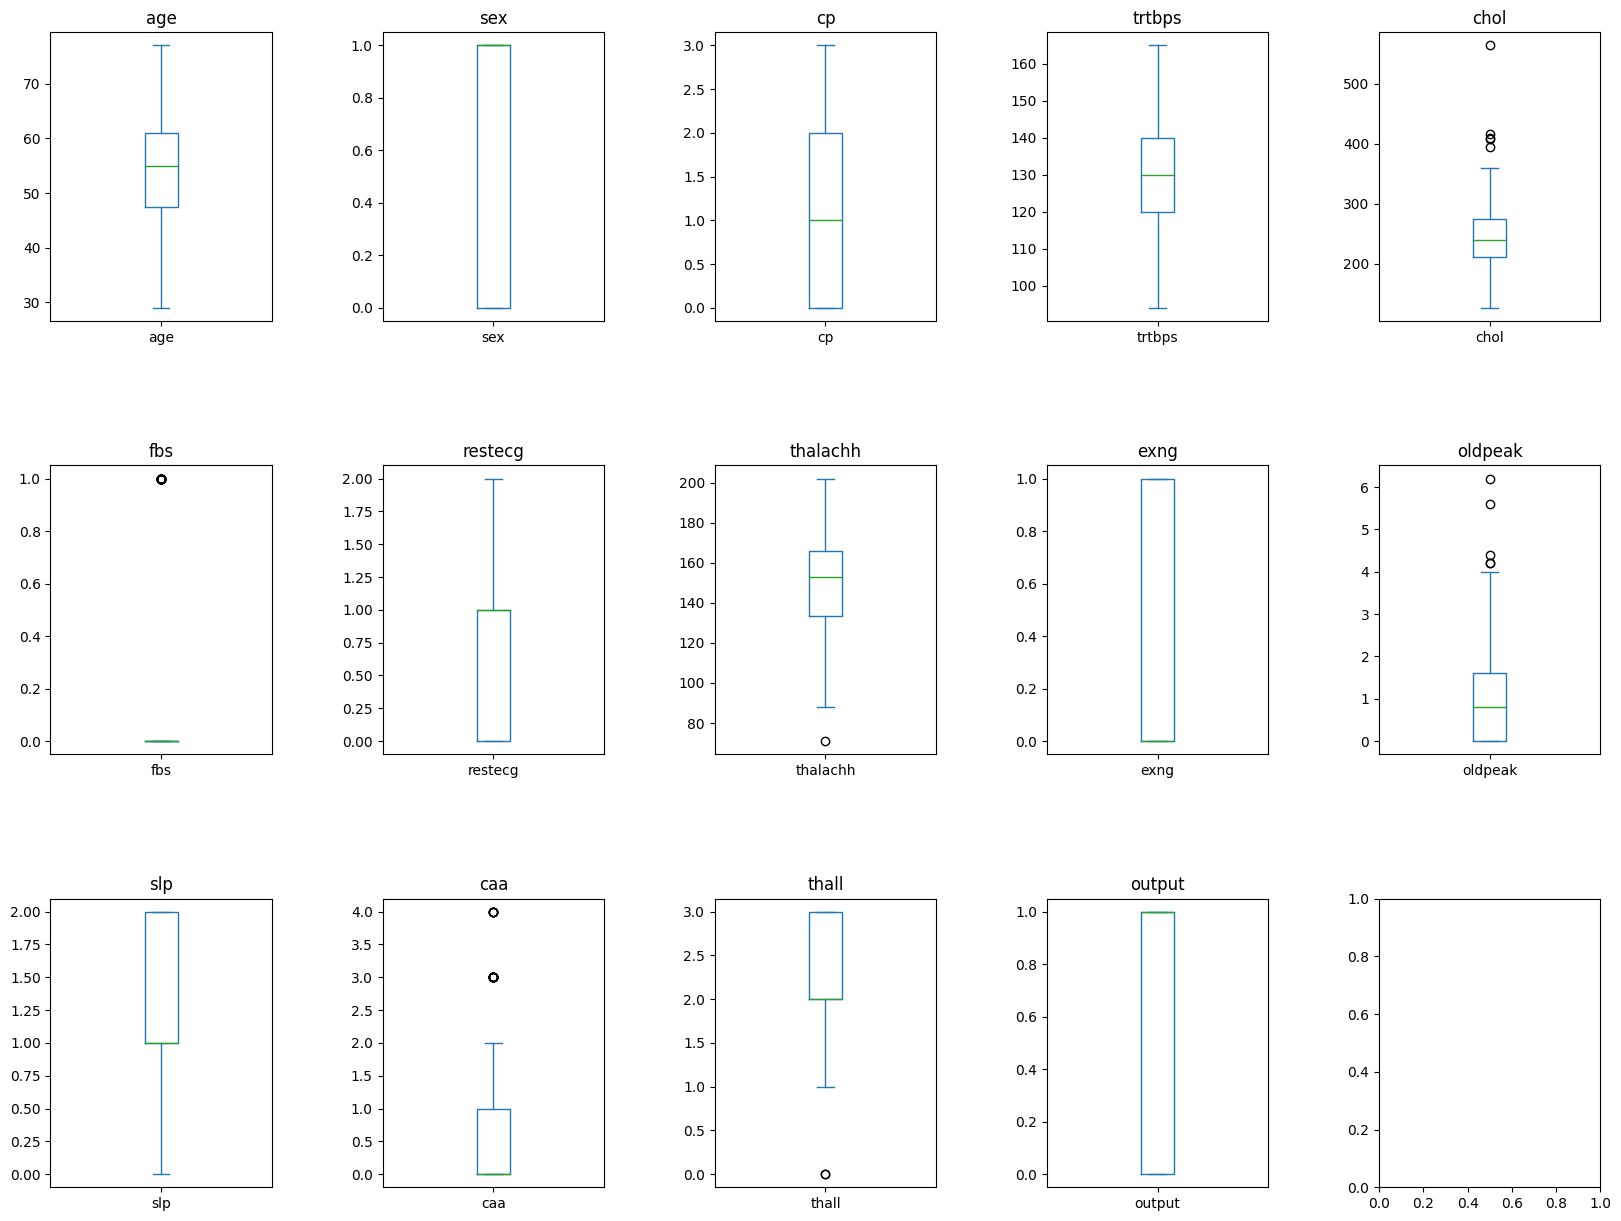

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, col in enumerate(data.columns):
    row_index = i // 5
    col_index = i % 5
    data[col].plot(kind='box', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

plt.show()

In [15]:
median_value = data['trtbps'].median()
data['trtbps'] = np.where((data['trtbps'] > 168), median_value, data['trtbps'])

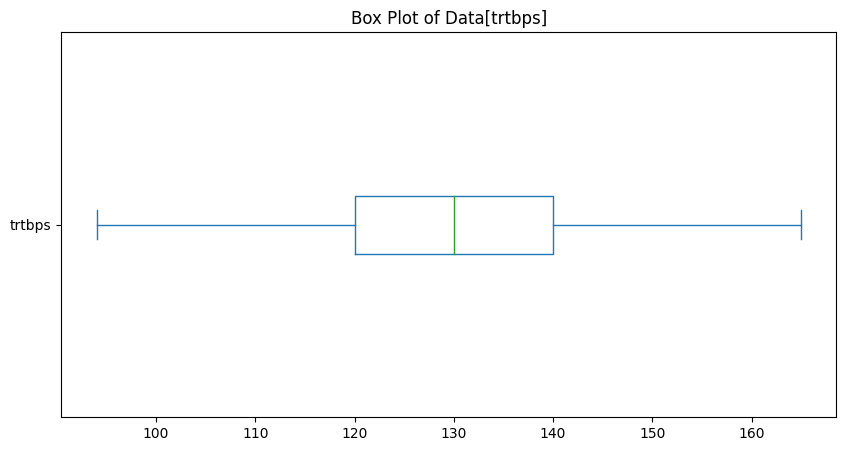

In [16]:
data['trtbps'].plot(kind='box', figsize=(10, 5), vert= False)
plt.title('Box Plot of Data[trtbps]')
plt.show()

In [17]:
median_value = data['chol'].median()
data['chol'] = np.where((data['chol'] > 380), median_value, data['chol'])

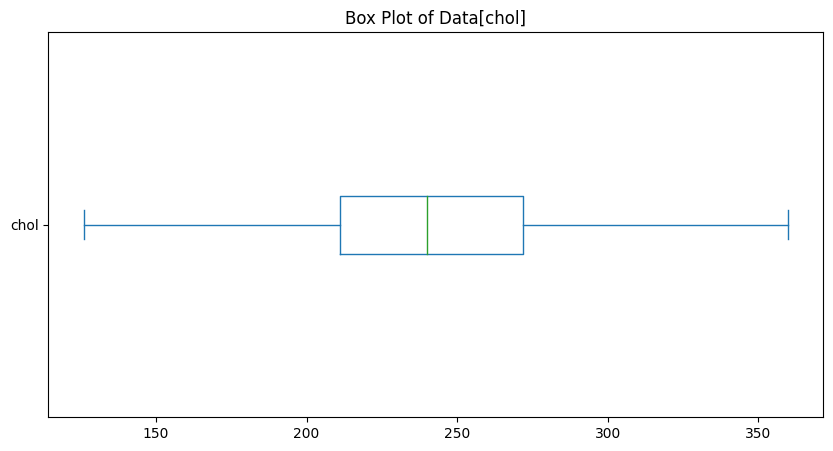

In [18]:
data['chol'].plot(kind='box', figsize=(10, 5),vert=False)
plt.title('Box Plot of Data[chol]')
plt.show()

In [19]:
median_value = data['oldpeak'].median()
data['oldpeak'] = np.where((data['oldpeak'] > 4), median_value, data['oldpeak'])

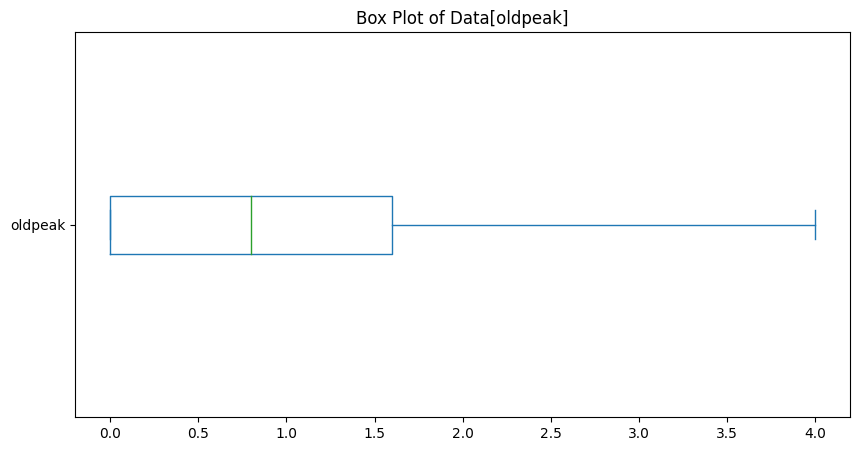

In [20]:
data['oldpeak'].plot(kind='box', figsize=(10, 5),vert=False)
plt.title('Box Plot of Data[oldpeak]')
plt.show()

In [21]:
median_value = data['caa'].median()
data['caa'] = np.where((data['caa'] > 2), median_value, data['caa'])

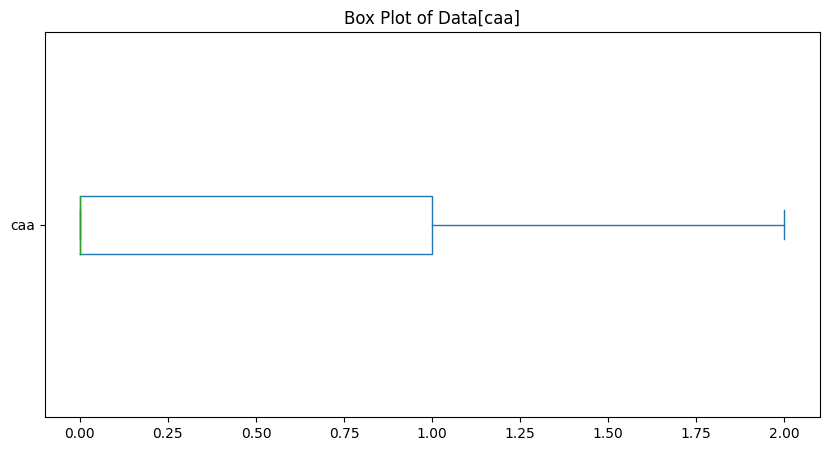

In [22]:
data['caa'].plot(kind='box', figsize=(10, 5),vert=False)
plt.title('Box Plot of Data[caa]')
plt.show()

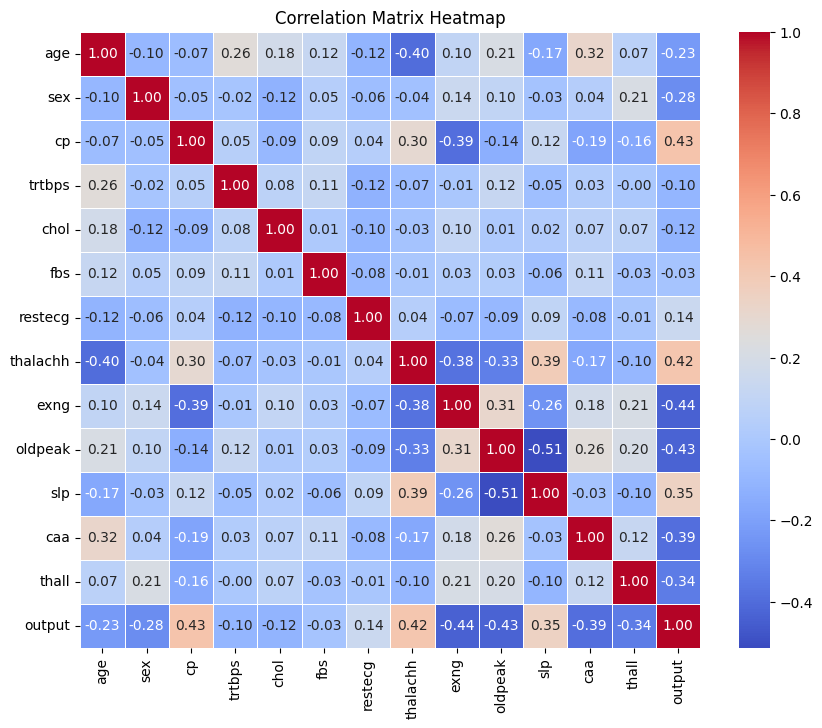

In [29]:
corr = data.corr()

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
rel = corr['output'].sort_values(ascending = False)
rel

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
trtbps     -0.102804
chol       -0.115910
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391731
oldpeak    -0.430495
exng       -0.436757
Name: output, dtype: float64

In [31]:
l = []
for i in range (len(rel)):
    if rel[i] > 0:
        l.append(rel.index[i])
l

['output', 'cp', 'thalachh', 'slp', 'restecg']

In [36]:
X = data.drop('output', axis=1)
y = data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = SVC(kernel='linear')


clf.fit(X_train, y_train)


score = clf.score(X_test, y_test)
print('Accuracy:', score)


Accuracy: 0.8524590163934426


In [37]:

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

score = dtree.score(X_test, y_test)
print('Accuracy:', score)


Accuracy: 0.7213114754098361


In [39]:
from sklearn.neighbors import KNeighborsClassifier
l = []
maxi = 0
ind = 0
best = 0
best_predict = 0
for i in range (4, 40):
    kcla = KNeighborsClassifier(n_neighbors = i)
    kcla.fit(X_train, y_train)
    predict = kcla.predict(X_test)
    acu = accuracy_score(predict, y_test)
    l.append(acu)
    if maxi < acu :
        maxi = acu
        ind = i
        best = acu
        best_predict = predict

Accuracy using K Nearest Neighbors is: 75.40983606557377 %


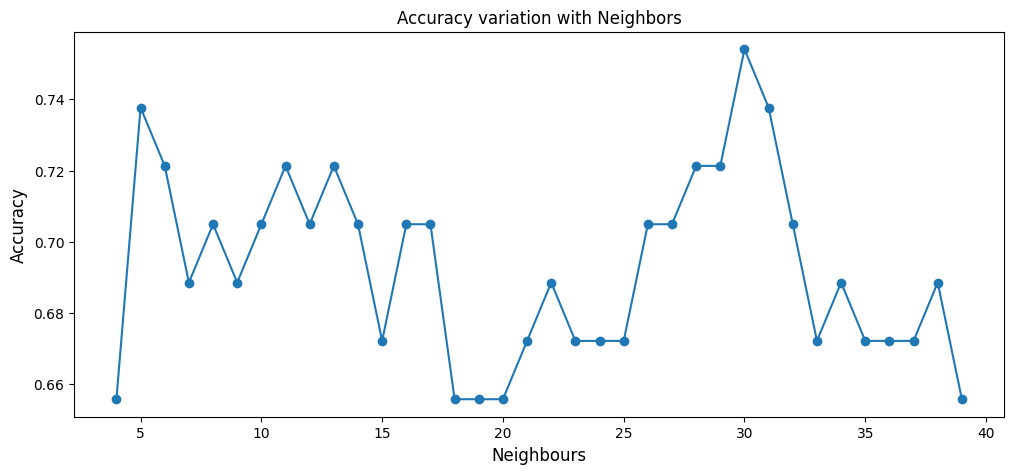

In [40]:
plt.figure(figsize = (12,5))
plt.plot(range (4, 40), l, marker = 'o')
plt.xlabel('Neighbours', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with Neighbors', size = 12)
print("Accuracy using K Nearest Neighbors is: {} %".format(best*100))

In [41]:
best = 0
esti = 0
best_predict = 0
l = []
for i in range (20, 110):
    rcla = RandomForestClassifier(n_estimators = i)
    rcla.fit(X_train, y_train)
    predict = rcla.predict(X_test)
    acu = accuracy_score(predict, y_test)
    l.append(acu)
    if best < acu:
        best = acu
        best_predict = predict

Accuracy using Random Forest is: 91.80327868852459 %


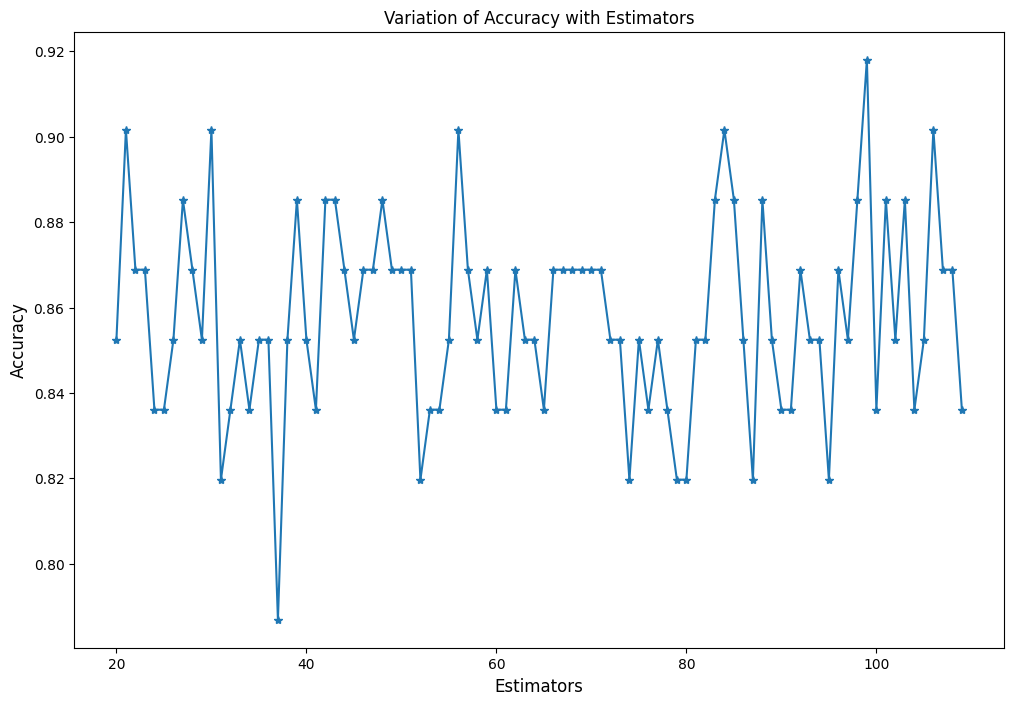

In [42]:
plt.figure(figsize = (12,8))
plt.plot(range (20 ,110), l, marker = "*")
plt.xlabel("Estimators", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.title("Variation of Accuracy with Estimators", size = 12)
print("Accuracy using Random Forest is: {} %".format(best*100))

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=9000)

lr.fit(X_train, y_train)

score = lr.score(X_test, y_test)
print('Accuracy:', score)


Accuracy: 0.8524590163934426
